In [2]:
### the ising model using metropolis steps (in real space)
### benchmark the worm!

using Printf
using Plots



L       = 10             # linear size of lattice
n_sweep = 20             # number of sweeps between sampling
n_therm = 1000           # number of sweeps to thermalize
n_data  = 100            # number of data samples per temperature
temps   = 4.0:-0.3:0.1  # temperatures to sample

function measure(i, energy, magnetization, s)      # measure i'th sample of energy and magnetization
    en = 0
    m = 0
    for x = 1:L
        for y = 1:L
            u = 1+mod(y,L) # up
            r = 1+mod(x,L) # right
            en -= s[x,y]*(s[x,u]+s[r,y]) # energy
            m  += s[x,y]                 # magnetization
        end
    end
    energy[i] = en
    magnetization[i] = abs(m)
end

function flip(x, y, T, s) # apply metropolis spin flip algorithm to site (x,y) w/ temp T
    u = 1+mod(y,L)   # up
    d = 1+mod(y-2,L) # down
    r = 1+mod(x,L)   # right
    l = 1+mod(x-2,L) # left
    de = 2*s[x,y]*(s[x,u]+s[x,d]+s[l,y]+s[r,y])
    if (de < 0)
        s[x,y] = -s[x,y]
    else
        p = rand()
        if (p < exp(-de/T))
            s[x,y] = -s[x,y]
        end
    end
end

function sweep(n, T, s) # apply flip() to every site on the lattice
    for i = 1:n
        for x = 1:L
            for y = 1:L
                flip(x,y,T, s)
            end
        end
    end
end


e1 = Array(1:n_data)     # array to hold energy measurements (fixed T)
m1 = Array(1:n_data)     # array to hold magnetization measurements (fixed T)
et = []                  # array to append average energy at each T
mt = []    # "                      magnetizations
cvt = []
chit = []
s  = ones(Int32,L, L)     # lattice of Ising spins (+/-1)    

for T in temps              # loop over temperatures
    sweep(n_therm, T, s)    # thermalize the lattice
    energy        = e1      # reset energy measurement array
    magnetization = m1      # same
    for i = 1:n_data        # take n_data measurements w/ n_sweep 
        sweep(n_sweep, T, s)   
        measure(i, energy, magnetization, s)
    end
    en_ave = sum(energy)/n_data           # compute average
    cv_ave = sqrt(sum((energy .- en_ave).^2) / (n_data - 1))
    ma_ave = sum(magnetization)/n_data
    chi_ave = sqrt(sum((magnetization .- ma_ave).^2) / (n_data - 1))
    push!(et,en_ave/(L*L))                # add to the list
    push!(mt,ma_ave/(L*L))
    push!(cvt, cv_ave/(L^2))
    push!(chit, chi_ave/(L^2))
    @printf("%8.3f  %8.3f \n", en_ave/(L*L), ma_ave/(L*L))
end
#plot(temps,mt) # plot magnetization vs. temperature
#plot(temps,et)


  -0.587     0.185 
  -0.613     0.187 
  -0.699     0.223 
  -0.777     0.239 
  -0.926     0.360 
  -1.186     0.542 
  -1.582     0.804 
  -1.832     0.946 
  -1.924     0.979 
  -1.981     0.995 
  -1.996     0.999 
  -2.000     1.000 
  -2.000     1.000 
  -2.000     1.000 


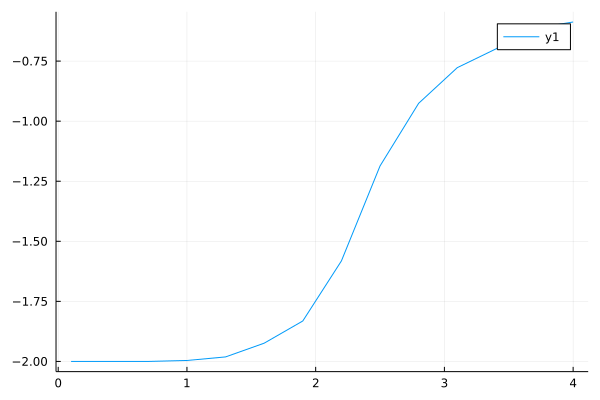

In [3]:
#energy plot
plot(temps, et)

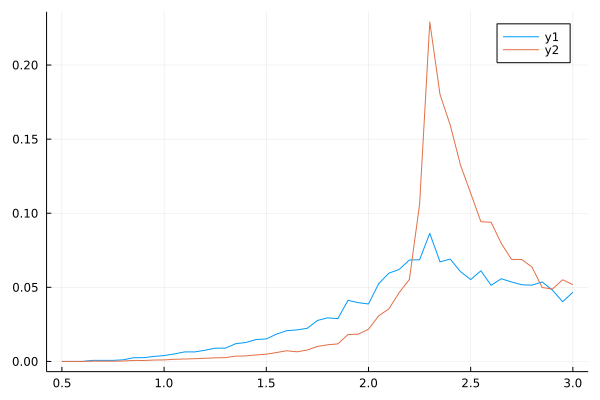

In [12]:
#specific heat and chi plot
p = plot(temps, cvt)
plot(p, temps, chit)